**Importing necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from statistics import mode
from scipy import stats as scs
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
%matplotlib inline

In [2]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']  =  [10, 5]
plt.rcParams['figure.dpi']  =  75
warnings.simplefilter(action = 'ignore', category = FutureWarning)

# Capstone Task 2.1 (Visualization using Python)

**Here are some indicative types of analysis you can perform. Please note that this is not an exhaustive list, you may add more**

**o Analysis of percentage of default and check whether it is imbalanced data?**

**o Replace missing values with appropriate techniques**

**o Use the right treatment for outliers in the data**

**o Analyse default variable with demographic related data**

**o Determine and draw insights on association between default and other variables , both categorical and numerical.**


**Loading the DataSet**

In [3]:
loan_df = pd.read_csv('Loan_details.csv')
status_df = pd.read_csv('Loan_status.csv')
Branch_df = pd.read_csv('Branch_region_mapping.csv')

In [4]:
loan_df.head(8)

,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,1,36439,65850,56.19,64,14-06-1990,Self employed,28-09-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0
1,2,48749,69303,72.15,67,01-01-1991,Salaried,10-09-2018,1,1,0,0,0,0,783,0,2yrs 6mon,0
2,3,55348,66340,85.00,2,16-08-1993,Self employed,31-08-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0
3,4,48849,64133,77.96,217,01-01-1989,Self employed,13-10-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0
4,5,40394,59386,70.72,74,31-12-1974,Self employed,14-09-2018,1,1,0,0,0,0,14,1,3yrs 1mon,1
5,6,51803,67466,79.30,162,23-11-1964,Self employed,17-08-2018,1,1,0,0,0,0,300,0,15yrs 2mon,0
6,7,61947,109094,58.21,251,01-10-1989,Self employed,16-08-2018,1,0,0,1,0,0,737,0,1yrs 10mon,0
7,8,51301,61815,85.00,67,01-01-1995,Salaried,26-08-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0


In [5]:
status_df.head(8)

,Loan_id,loan_default
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0


In [6]:
Branch_df.head(8)

,branch_id,region
0,1,East
1,2,East
2,3,East
3,5,East
4,7,East
5,8,East
6,9,East
7,10,East


**Creating Master dataframe by combining all subsidiary data**

In [7]:
# master_df = loan_df.join(Branch_df.set_index('branch_id'), on = 'branch_id' )
# master_df = master_df.join(status_df.set_index('Loan_id'), on = 'Loan_id')
# master_df.head(8)

In [8]:
master_df=pd.merge(loan_df,Branch_df,how='left',on='branch_id')
master_df=pd.merge(master_df,status_df,how='left',on='Loan_id')
master_df

,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,region,loan_default
0,1,36439,65850,56.19,64,14-06-1990,Self employed,28-09-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,South,0
1,2,48749,69303,72.15,67,01-01-1991,Salaried,10-09-2018,1,1,0,0,0,0,783,0,2yrs 6mon,0,South,0
2,3,55348,66340,85.00,2,16-08-1993,Self employed,31-08-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,East,1
3,4,48849,64133,77.96,217,01-01-1989,Self employed,13-10-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,North,0
4,5,40394,59386,70.72,74,31-12-1974,Self employed,14-09-2018,1,1,0,0,0,0,14,1,3yrs 1mon,1,South,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,23311,123661,185371,69.59,34,14-12-1982,Self employed,26-08-2018,1,1,0,0,0,0,650,0,5yrs 10mon,1,East,0
23311,23312,78879,122878,65.11,5,03-07-1993,Salaried,23-09-2018,1,1,0,0,0,0,680,0,0yrs 9mon,0,East,0
23312,23313,49349,67695,73.86,48,01-01-1994,Self employed,23-10-2018,1,1,0,0,0,0,825,0,2yrs 3mon,0,South,0
23313,23314,70897,84400,86.00,2,10-10-1982,Self employed,25-08-2018,1,1,0,0,0,0,657,0,0yrs 6mon,2,East,0


Describing the numerical features

In [9]:
master_df.describe()

,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.0,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000
mean,11658.000000,54297.647309,75842.182887,74.701607,72.079262,1.0,0.845078,0.075531,0.141068,0.023161,0.002059,291.234956,0.100622,0.205790,0.219858
std,6730.605099,13061.877434,18988.525635,11.462722,69.095008,0.0,0.361838,0.264252,0.348099,0.150418,0.045328,338.490214,0.388782,0.699901,0.414159
min,1.000000,13369.000000,37230.000000,17.130000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5829.500000,46949.000000,65629.000000,68.830000,13.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11658.000000,53759.000000,70929.000000,76.710000,61.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17486.500000,60379.000000,79354.500000,83.630000,121.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,679.000000,0.000000,0.000000,0.000000
max,23315.000000,592460.000000,715186.000000,94.980000,261.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,890.000000,7.000000,23.000000,1.000000


Describing the categorical features

In [10]:
master_df.describe(include=['object', 'bool'])

,Date.of.Birth,Employment.Type,DisbursalDate,CREDIT.HISTORY.LENGTH,region
count,23315,22545,23315,23315,23315
unique,8729,2,84,212,4
top,01-01-1988,Self employed,31-10-2018,0yrs 0mon,East
freq,235,12724,862,11891,10491


**Finding Missing Values for data cleaning**

In [11]:
# master_df.isnull().sum()

In [12]:
# master_df.isna().sum()

In [13]:
count_nan = len(master_df)-master_df.count()
count_nan

Loan_id                                  0
disbursed_amount                         0
asset_cost                               0
ltv                                      0
branch_id                                0
Date.of.Birth                            0
Employment.Type                        770
DisbursalDate                            0
MobileNo_Avl_Flag                        0
Aadhar_flag                              0
PAN_flag                                 0
VoterID_flag                             0
Driving_flag                             0
Passport_flag                            0
PERFORM_CNS.SCORE                        0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS      0
CREDIT.HISTORY.LENGTH                    0
NO.OF_INQUIRIES                          0
region                                   0
loan_default                             0
dtype: int64

In [14]:
master_df.shape

(23315, 20)

Finding if any Duplicate values

In [15]:
len(master_df['Loan_id'].unique())

23315

In [16]:
# master_df['Employment.Type'].value_counts()

In [17]:
master_df.groupby('Employment.Type').Loan_id.nunique()

Employment.Type
Salaried          9821
Self employed    12724
Name: Loan_id, dtype: int64

**Missing value treatment - Replacing Null Values with String**

In [18]:
#master_df.replace(to_replace = np.nan, value = 'Unemployed', inplace = True)
#master_df.isnull().sum()

In [19]:
# master_df.isnull().sum()

In [20]:
replace_with='Unemployed'
master_df["Employment.Type"].fillna(replace_with,inplace=True)
master_df.isnull().sum()

Loan_id                                0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0
CREDIT.HISTORY.LENGTH                  0
NO.OF_INQUIRIES                        0
region                                 0
loan_default                           0
dtype: int64

**We are assuming Missing values in Employment.Type as Unemployed, instead of just dropping the Nan values. Further analysis is conducted below to confirm this chosen label.**

In [21]:
# master_df['Employment.Type'].value_counts()

In [22]:
categories=master_df.groupby('Employment.Type').Loan_id.nunique()
categories

Employment.Type
Salaried          9821
Self employed    12724
Unemployed         770
Name: Loan_id, dtype: int64

([<matplotlib.patches.Wedge at 0x2227c5d8130>,
 [Text(0.26943655250091997, 1.0664914177696974, 'Salaried'),
  Text(-0.37844194363974765, -1.0328512454822187, 'Self employed'),
  Text(1.0940846304441894, -0.11392463046155454, 'Unemployed')])

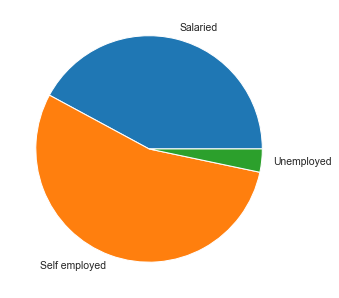

In [23]:
plt.pie(categories,labels=['Salaried','Self employed','Unemployed'])

**Detecting outliers and treating the dataset for outliers**

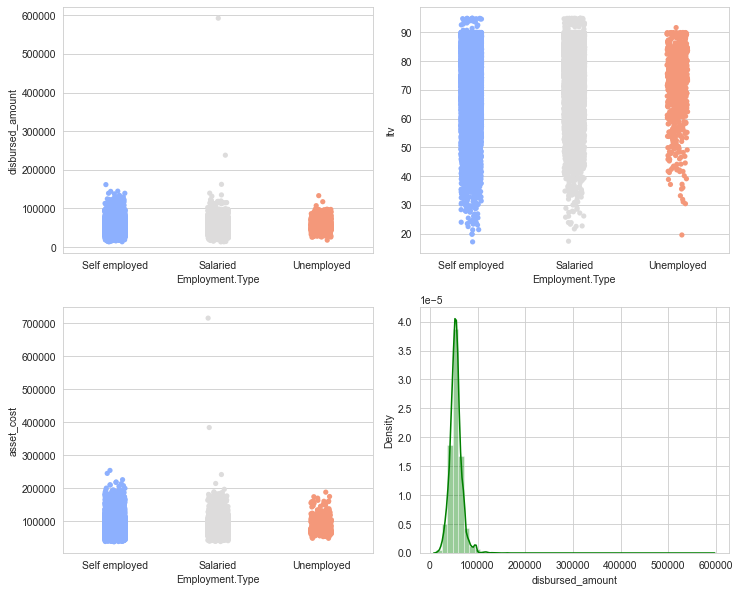

In [24]:
fig, axs = plt.subplots(2,2, figsize=(10,8))
sns.stripplot(x=master_df['Employment.Type'], y=master_df['disbursed_amount'], palette= 'coolwarm', ax = axs[0][0])
sns.stripplot(x=master_df['Employment.Type'], y=master_df['ltv'], palette= 'coolwarm', ax = axs[0][1])
sns.stripplot(x=master_df['Employment.Type'], y=master_df['asset_cost'], palette= 'coolwarm', ax = axs[1][0])
sns.distplot(a =master_df['disbursed_amount'], color = 'g', kde = True, ax = axs[1][1])
plt.tight_layout()

Finding the upper and lower limits for outliers.

In [25]:
upper_limit = master_df['disbursed_amount'].quantile(0.9999)
lower_limit = master_df['disbursed_amount'].quantile(0.01)
print(upper_limit,lower_limit)

162078.69439999806 26336.0


In [26]:
# iqr=np.percentile(master_df['disbursed_amount'],75,interpolation='midpoint')-np.percentile(master_df['disbursed_amount'],25,interpolation='midpoint')
# upper_limit = master_df['disbursed_amount'].quantile(0.75)+ 1.5 * iqr
# lower_limit = master_df['disbursed_amount'].quantile(0.25)- 1.5 * iqr
# print(upper_limit,lower_limit)

In [27]:
master_df = master_df[master_df['disbursed_amount']<upper_limit]
master_df

,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,region,loan_default
0,1,36439,65850,56.19,64,14-06-1990,Self employed,28-09-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,South,0
1,2,48749,69303,72.15,67,01-01-1991,Salaried,10-09-2018,1,1,0,0,0,0,783,0,2yrs 6mon,0,South,0
2,3,55348,66340,85.00,2,16-08-1993,Self employed,31-08-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,East,1
3,4,48849,64133,77.96,217,01-01-1989,Self employed,13-10-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,North,0
4,5,40394,59386,70.72,74,31-12-1974,Self employed,14-09-2018,1,1,0,0,0,0,14,1,3yrs 1mon,1,South,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,23311,123661,185371,69.59,34,14-12-1982,Self employed,26-08-2018,1,1,0,0,0,0,650,0,5yrs 10mon,1,East,0
23311,23312,78879,122878,65.11,5,03-07-1993,Salaried,23-09-2018,1,1,0,0,0,0,680,0,0yrs 9mon,0,East,0
23312,23313,49349,67695,73.86,48,01-01-1994,Self employed,23-10-2018,1,1,0,0,0,0,825,0,2yrs 3mon,0,South,0
23313,23314,70897,84400,86.00,2,10-10-1982,Self employed,25-08-2018,1,1,0,0,0,0,657,0,0yrs 6mon,2,East,0


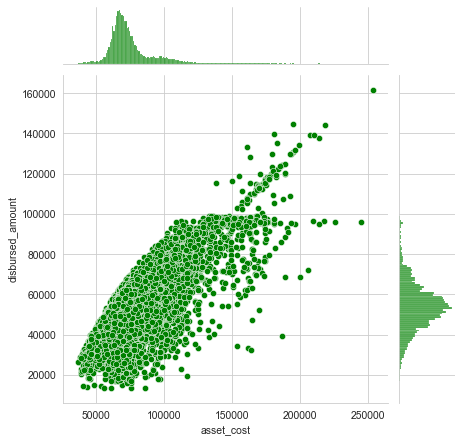

In [28]:
sns.jointplot(x = master_df['asset_cost'], y = master_df['disbursed_amount'] , kind='scatter',color='g')

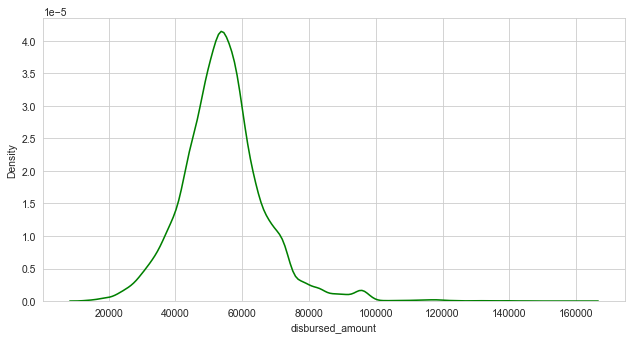

In [29]:
sns.kdeplot(master_df['disbursed_amount'],color = 'g');

((array([-4.01491945, -3.80060369, -3.68340909, ...,  3.68340909,
          3.80060369,  4.01491945]),
  array([ 13369,  13600,  13664, ..., 144085, 144698, 161608], dtype=int64)),
 (12249.720948322622, 54262.05799588196, 0.9797903051071684))

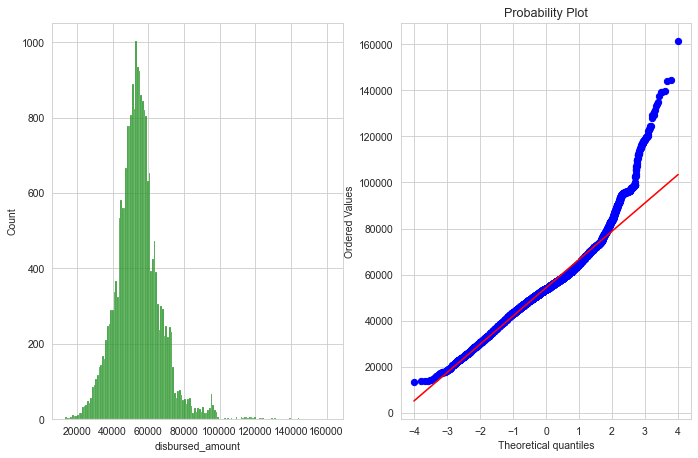

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(11,7))
sns.histplot(x = master_df['disbursed_amount'],color='g', ax = axs[0])
scs.probplot(master_df['disbursed_amount'], plot=plt )

We are featurizing 'Age' to analyze demographic distribution of the dataset.

In [31]:
# DOB_series = pd.to_datetime(master_df['Date.of.Birth'])
# Age_series = date.today().year - DOB_series.map(lambda dt: dt.year)
# master_df['Age'] = Age_series
# master_df

In [32]:
from datetime import datetime
from datetime import date
def calculate_age(born):
    born = datetime.strptime(born, "%d-%m-%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
master_df['Age'] = master_df['Date.of.Birth'].apply(calculate_age)
master_df

<ipython-input-32-c3db47bbb4f0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df['Age'] = master_df['Date.of.Birth'].apply(calculate_age)


,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,...,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,region,loan_default,Age
0,1,36439,65850,56.19,64,14-06-1990,Self employed,28-09-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,South,0,31
1,2,48749,69303,72.15,67,01-01-1991,Salaried,10-09-2018,1,1,...,0,0,0,783,0,2yrs 6mon,0,South,0,30
2,3,55348,66340,85.00,2,16-08-1993,Self employed,31-08-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,East,1,28
3,4,48849,64133,77.96,217,01-01-1989,Self employed,13-10-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,North,0,32
4,5,40394,59386,70.72,74,31-12-1974,Self employed,14-09-2018,1,1,...,0,0,0,14,1,3yrs 1mon,1,South,0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,23311,123661,185371,69.59,34,14-12-1982,Self employed,26-08-2018,1,1,...,0,0,0,650,0,5yrs 10mon,1,East,0,38
23311,23312,78879,122878,65.11,5,03-07-1993,Salaried,23-09-2018,1,1,...,0,0,0,680,0,0yrs 9mon,0,East,0,28
23312,23313,49349,67695,73.86,48,01-01-1994,Self employed,23-10-2018,1,1,...,0,0,0,825,0,2yrs 3mon,0,South,0,27
23313,23314,70897,84400,86.00,2,10-10-1982,Self employed,25-08-2018,1,1,...,0,0,0,657,0,0yrs 6mon,2,East,0,39


**Assessing the dataset based on Defaulted status**

In [33]:
#defaulted = master_df['loan_default'].value_counts()[1]/len(master_df['loan_default'])*100
#print('{:2f} %'.format(defaulted))

In [34]:
defaulted= master_df['loan_default'].value_counts(normalize=True)[1]
print('{:2f} %'.format(defaulted*100))

21.988675 %


**The percentage value here suggests that the majority of the data belongs to the Not Defaulted category which may lead to majority oversampling if the whole dataset is considered for training the model.**

In [35]:
defaulted_df = master_df[master_df['loan_default']==1]
defaulted_df

,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,...,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,region,loan_default,Age
2,3,55348,66340,85.00,2,16-08-1993,Self employed,31-08-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,East,1,28
9,10,34639,69717,50.49,34,23-11-1982,Self employed,26-10-2018,1,1,...,0,0,0,300,0,3yrs 10mon,0,East,1,38
19,20,78151,107074,74.25,135,05-06-1987,Self employed,25-10-2018,1,1,...,1,0,0,0,0,0yrs 0mon,0,West,1,34
26,27,45795,61513,76.41,73,15-09-1978,Salaried,20-09-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,South,1,43
27,28,53303,63376,86.78,3,16-09-1989,Salaried,07-09-2018,1,1,...,0,0,0,710,0,0yrs 6mon,0,East,1,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23279,23280,39664,62270,66.28,36,02-09-1968,Salaried,09-08-2018,1,0,...,1,0,0,694,0,5yrs 1mon,0,East,1,53
23281,23282,49850,87344,58.39,138,01-01-1988,Self employed,06-09-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,West,1,33
23284,23285,43617,58075,79.90,105,01-01-1988,Salaried,31-08-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,West,1,33
23289,23290,53303,65728,83.68,16,01-01-1991,Salaried,08-08-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,East,1,30


#### Analyzing the dataset based on categorical data such as 'Region','Employment Type'. Also, Numeric Features 'CNS Score' and 'Delinquent Account count' considered.

Summary Contingency table

In [36]:
pd.crosstab(master_df['loan_default'],master_df['Employment.Type'])

Employment.Type,Salaried,Self employed,Unemployed
loan_default,,,
0,7803,9791,592
1,2015,2933,178


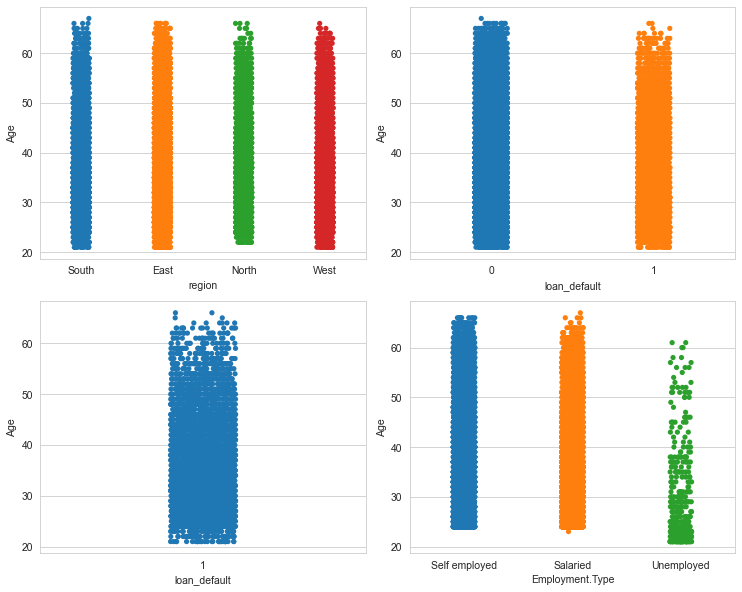

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(10,8))
sns.stripplot(x = master_df['region'], y = master_df['Age'], ax= axs[0][0])
sns.stripplot(x = master_df['loan_default'], y = master_df['Age'], ax= axs[0][1])
sns.stripplot(x = defaulted_df['loan_default'], y = defaulted_df['Age'], ax= axs[1][0])
sns.stripplot(x = master_df['Employment.Type'], y = master_df['Age'], ax= axs[1][1])
plt.tight_layout()

In [38]:
pd.crosstab(master_df['PERFORM_CNS.SCORE'],master_df['loan_default'])

loan_default,0,1
PERFORM_CNS.SCORE,,
0,8931,2725
11,1,0
14,69,27
15,281,94
16,241,54
...,...,...
869,2,0
870,4,1
873,1,0


In [39]:
pd.crosstab(master_df['loan_default'],master_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'])

DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,0,1,2,3,4,5,6,7
loan_default,,,,,,,,
0,16832,1102,186,46,9,6,4,1
1,4619,413,71,16,3,3,0,1


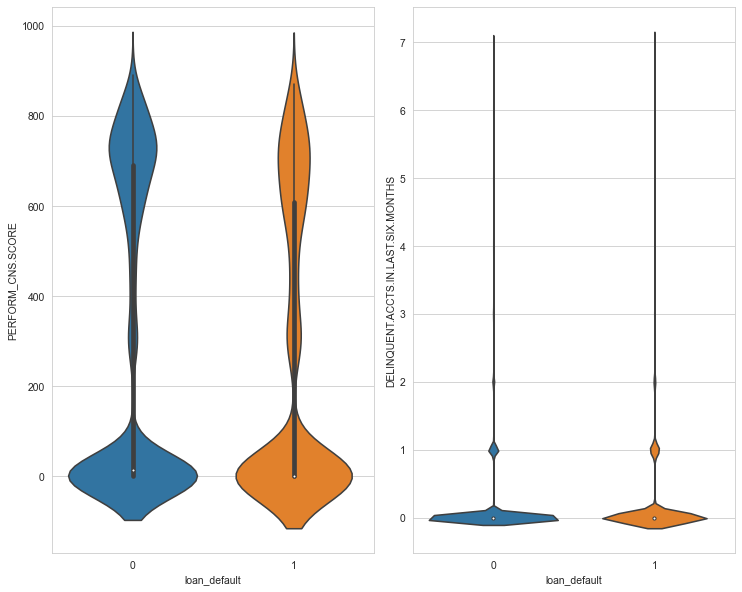

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(10,8))
sns.violinplot(x = master_df['loan_default'], y = master_df['PERFORM_CNS.SCORE'], ax = axs[0])
sns.violinplot(x = master_df['loan_default'], y = master_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'], ax = axs[1])
plt.tight_layout()

# Conclusion:
## After analyzing  Age distribution among different Employment types, it is observed that the Unemployment type (which is earlier replaced with this label as a part of missing value treatment) belongs to a lower age group which further confirms the label chosen, lower age group might yet to be Employed and forms the Educational loan portfolio of the bank.This section is more susceptible to default. Also, it is understood that individuals with lower Bureau score and high Delinquent accounts are more susceptible to default.

**Hypothesis Testing H₀: μ₁= μ₂ (mean of disbursed amounts as per loan status with in the population are equal)**

**H₁: Not all disbursed amount means as per loan status are equal α = 0.05**

In [41]:
import researchpy as rp

In [42]:
Group1 = master_df[master_df['loan_default']==1]['disbursed_amount']
Group2 = master_df[master_df['loan_default']==0]['disbursed_amount']

summary,results=rp.ttest(group1=Group1, group1_name="Default", group2=Group2, group2_name="No Default")

print(summary,results)

     Variable        N          Mean            SD          SE     95% Conf.  \
0     Default   5126.0  55842.926844  11967.380881  167.151321  55515.238886   
1  No Default  18186.0  53816.466128  12611.379162   93.517737  53633.162531   
2    combined  23312.0  54262.057996  12500.581062   81.872949  54101.581632   

       Interval  
0  56170.614801  
1  53999.769725  
2  54422.534360                        Independent t-test     results
0  Difference (Default - No Default) =    2026.4607
1                 Degrees of freedom =   23310.0000
2                                  t =      10.2742
3              Two side test p value =       0.0000
4             Difference < 0 p value =       1.0000
5             Difference > 0 p value =       0.0000
6                          Cohen's d =       0.1625
7                          Hedge's g =       0.1625
8                      Glass's delta =       0.1693
9                        Pearson's r =       0.0671


From the above as the p value is close to zero and the null hypothesis is rejected and hence there is significant difference in disbursed amount means as per loan status. The Box plot below gives a clear picture.

<AxesSubplot:xlabel='loan_default', ylabel='disbursed_amount'>

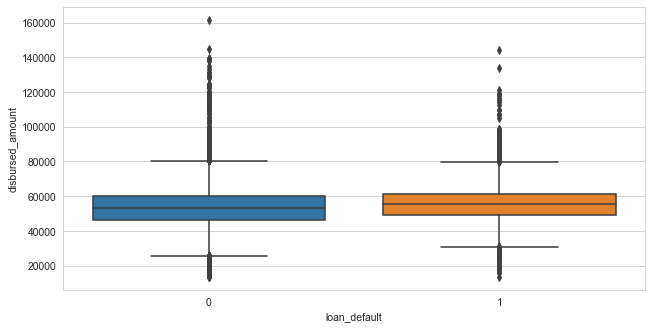

In [43]:
sns.boxplot(x = master_df['loan_default'], y = master_df['disbursed_amount'])

# TASK 2.2 (Exploratory Data Analysis)

**●	Univariate, Bi- Variate Analysis and Multi- Variate Analysis**

**●	Missing values identification and treatment**

**●	Outlier analysis and treatment** 

**●	Data scaling using min-max and/or  Z-score normalisation**

**●	Data transformation**

**●	Feature Engineering**

In [44]:
df=master_df

In [45]:
df['loan_default'].unique()

array([0, 1], dtype=int64)

#### Univariate data analysis

In [46]:
df_default = df.loc[df['loan_default']==1]
df_Notdefault = df.loc[df['loan_default']==0]

In [47]:
df_default.head()

,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,...,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,region,loan_default,Age
2,3,55348,66340,85.00,2,16-08-1993,Self employed,31-08-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,East,1,28
9,10,34639,69717,50.49,34,23-11-1982,Self employed,26-10-2018,1,1,...,0,0,0,300,0,3yrs 10mon,0,East,1,38
19,20,78151,107074,74.25,135,05-06-1987,Self employed,25-10-2018,1,1,...,1,0,0,0,0,0yrs 0mon,0,West,1,34
26,27,45795,61513,76.41,73,15-09-1978,Salaried,20-09-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,South,1,43
27,28,53303,63376,86.78,3,16-09-1989,Salaried,07-09-2018,1,1,...,0,0,0,710,0,0yrs 6mon,0,East,1,32


In [48]:
df_Notdefault.head()

,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,...,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,region,loan_default,Age
0,1,36439,65850,56.19,64,14-06-1990,Self employed,28-09-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,South,0,31
1,2,48749,69303,72.15,67,01-01-1991,Salaried,10-09-2018,1,1,...,0,0,0,783,0,2yrs 6mon,0,South,0,30
3,4,48849,64133,77.96,217,01-01-1989,Self employed,13-10-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,North,0,32
4,5,40394,59386,70.72,74,31-12-1974,Self employed,14-09-2018,1,1,...,0,0,0,14,1,3yrs 1mon,1,South,0,46
5,6,51803,67466,79.30,162,23-11-1964,Self employed,17-08-2018,1,1,...,0,0,0,300,0,15yrs 2mon,0,North,0,56


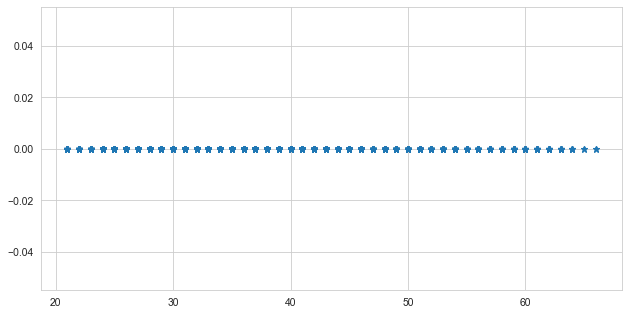

In [49]:
plt.plot(df_default['Age'],np.zeros_like(df_default['Age']),'*')

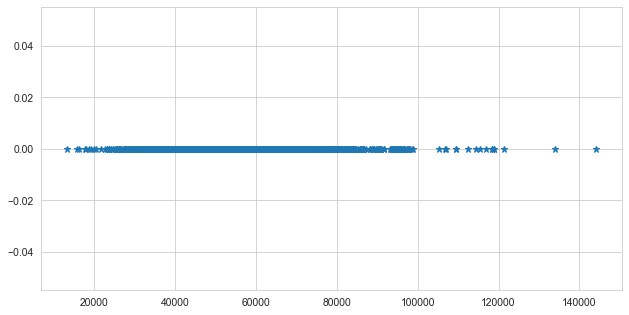

In [50]:
plt.plot(df_default['disbursed_amount'],np.zeros_like(df_default['disbursed_amount']),'*')

[Text(0.5, 0, 'index')]

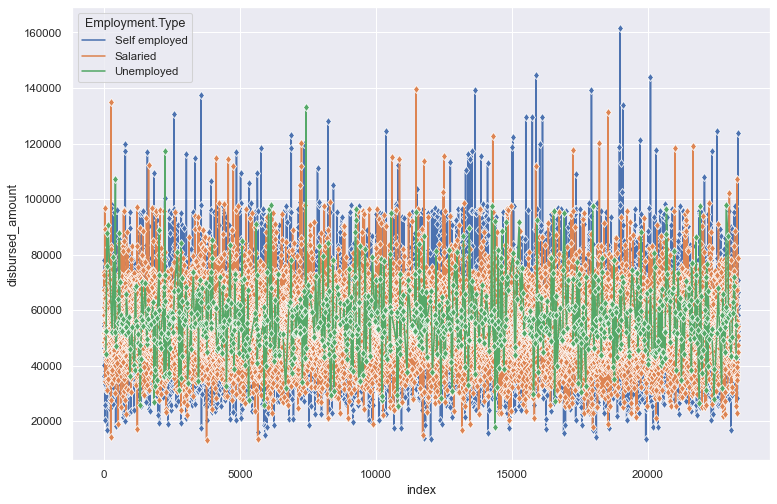

In [51]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale=1)
fig=sns.lineplot(x=df.index,y=df['disbursed_amount'],markevery=1,marker='d',data=df,hue=df['Employment.Type'])
fig.set(xlabel='index')

## Bivariate Data Analysis

#### Analysis between x="Age",y="disbursed_amount", grouping (hue) by 'Employment.Type'

<AxesSubplot:xlabel='Age', ylabel='disbursed_amount'>

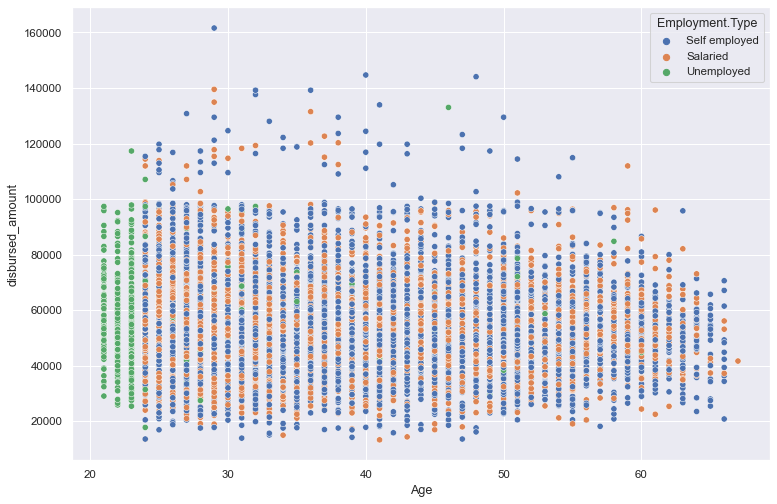

In [52]:
sns.scatterplot(x="Age",y="disbursed_amount",data = df, hue='Employment.Type')

#### Analysis between x="Age",y="DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS", grouping (hue) by 'Employment.Type'

<AxesSubplot:xlabel='Age', ylabel='DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'>

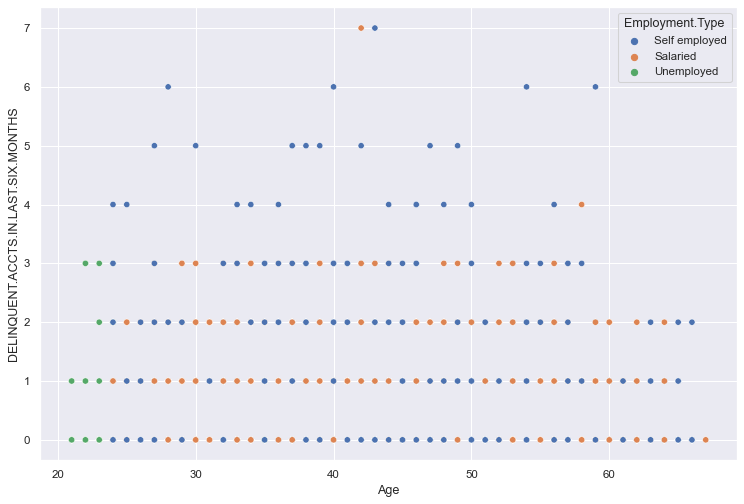

In [53]:
sns.scatterplot(x="Age",y="DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS",data = df, hue='Employment.Type')

#### Analysis between x="disbursed_amount",y="asset_cost", grouping (hue) by 'ltv'

<AxesSubplot:xlabel='disbursed_amount', ylabel='asset_cost'>

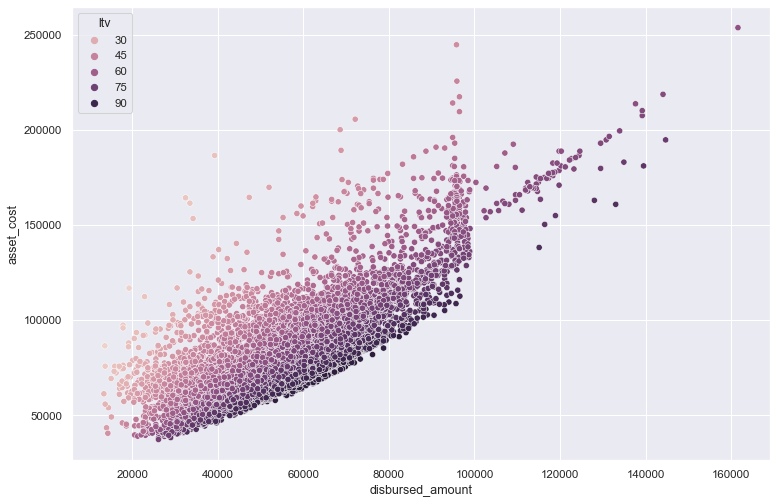

In [54]:
sns.scatterplot(x='disbursed_amount', y='asset_cost',hue= 'ltv', data=df)

More the LTV ratio, more the risk of customer being a defaulter.

## Multivariate Data Analysis

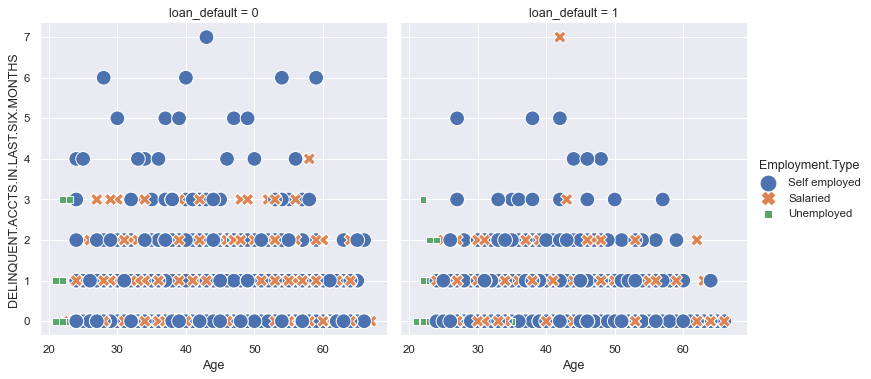

In [55]:
sns.relplot(x="Age",y="DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS",col="loan_default",hue="Employment.Type",style="Employment.Type",kind="scatter",data = df,size ="Employment.Type",sizes=(80,200))
plt.show()

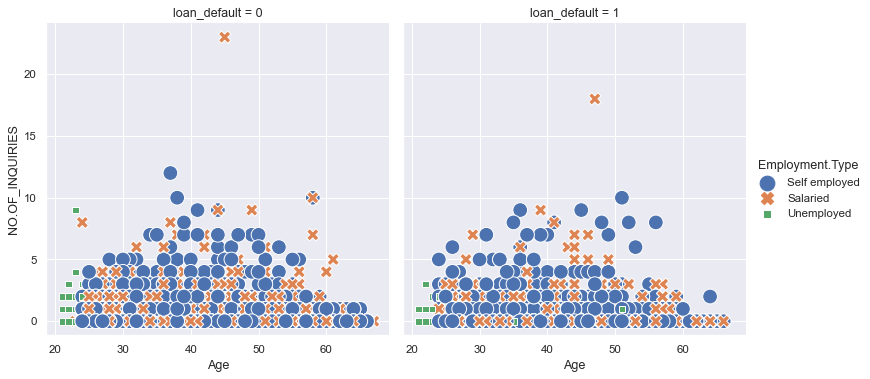

In [56]:
sns.relplot(x="Age",y="NO.OF_INQUIRIES",col="loan_default",hue="Employment.Type",style="Employment.Type",kind="scatter",data = df,size ="Employment.Type",sizes=(80,200))
plt.show()

The loan is not disbursed yet for the customers with NO.OF_INQUIRIES not equal to zero. Having high number of inquiries might indicate the loan burden on the customers in the long run.

In [57]:
df.columns

Index(['Loan_id', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'Date.of.Birth', 'Employment.Type', 'DisbursalDate',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'CREDIT.HISTORY.LENGTH',
       'NO.OF_INQUIRIES', 'region', 'loan_default', 'Age'],
      dtype='object')

In [58]:
df.drop(['Date.of.Birth', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag','Driving_flag', 'Passport_flag'], axis='columns', inplace=True)

C:\Users\rimgupta\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [59]:
df.columns

Index(['Loan_id', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'Employment.Type', 'DisbursalDate', 'PERFORM_CNS.SCORE',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'CREDIT.HISTORY.LENGTH',
       'NO.OF_INQUIRIES', 'region', 'loan_default', 'Age'],
      dtype='object')

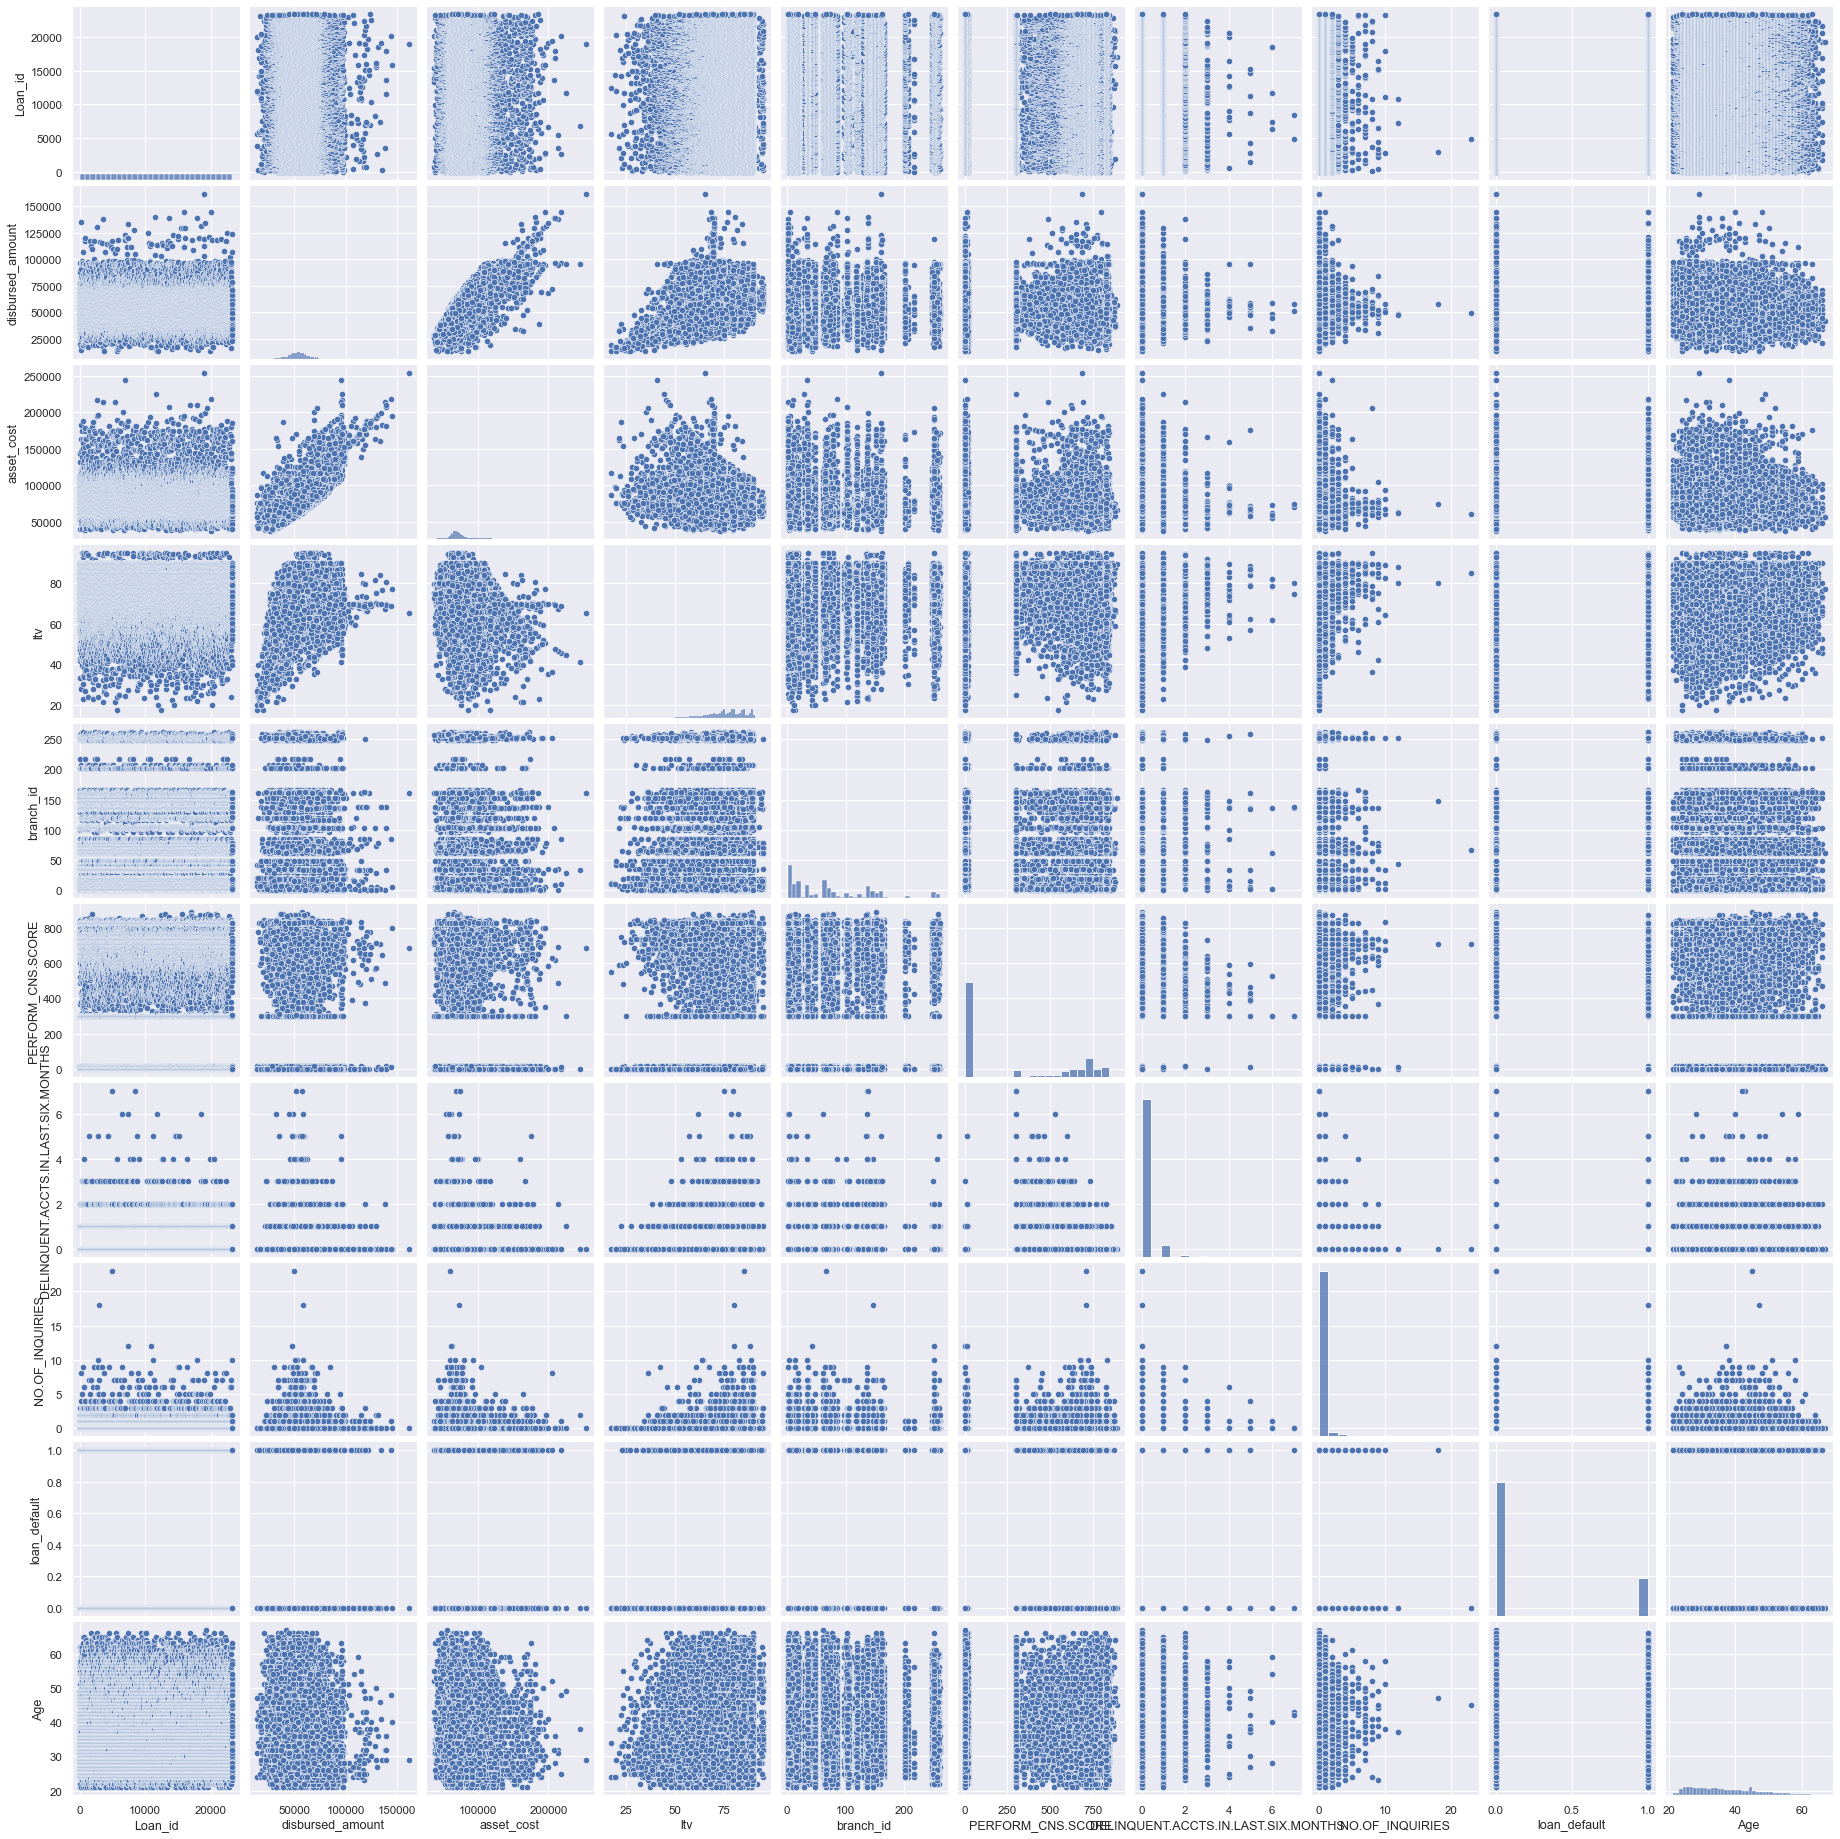

In [60]:
sns.pairplot(df)

In [61]:
df

,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Employment.Type,DisbursalDate,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,region,loan_default,Age
0,1,36439,65850,56.19,64,Self employed,28-09-2018,0,0,0yrs 0mon,0,South,0,31
1,2,48749,69303,72.15,67,Salaried,10-09-2018,783,0,2yrs 6mon,0,South,0,30
2,3,55348,66340,85.00,2,Self employed,31-08-2018,0,0,0yrs 0mon,0,East,1,28
3,4,48849,64133,77.96,217,Self employed,13-10-2018,0,0,0yrs 0mon,0,North,0,32
4,5,40394,59386,70.72,74,Self employed,14-09-2018,14,1,3yrs 1mon,1,South,0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,23311,123661,185371,69.59,34,Self employed,26-08-2018,650,0,5yrs 10mon,1,East,0,38
23311,23312,78879,122878,65.11,5,Salaried,23-09-2018,680,0,0yrs 9mon,0,East,0,28
23312,23313,49349,67695,73.86,48,Self employed,23-10-2018,825,0,2yrs 3mon,0,South,0,27
23313,23314,70897,84400,86.00,2,Self employed,25-08-2018,657,0,0yrs 6mon,2,East,0,39


#### Data scaling using min-max 

In [62]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['PERFORM_CNS.SCORE','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']])
df_std = std_scale.transform(df[['PERFORM_CNS.SCORE','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['PERFORM_CNS.SCORE','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']])
df_minmax = minmax_scale.transform(df[['PERFORM_CNS.SCORE','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']])

In [63]:
print('Mean after standardization:\nBureau_Score={:.2f}, Delinquent_Accts={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nBureau_Score={:.2f}, Delinquent_Accts={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
Bureau_Score=-0.00, Delinquent_Accts=0.00

Standard deviation after standardization:
Bureau_Score=1.00, Delinquent_Accts=1.00


In [64]:
print('Min-value after min-max scaling:\nBureau_Score={:.2f}, Delinquent_Accts={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nBureau_Score={:.2f}, Delinquent_Accts={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
Bureau_Score=0.00, Delinquent_Accts=0.00

Max-value after min-max scaling:
Bureau_Score=1.00, Delinquent_Accts=1.00


In [65]:
%matplotlib inline

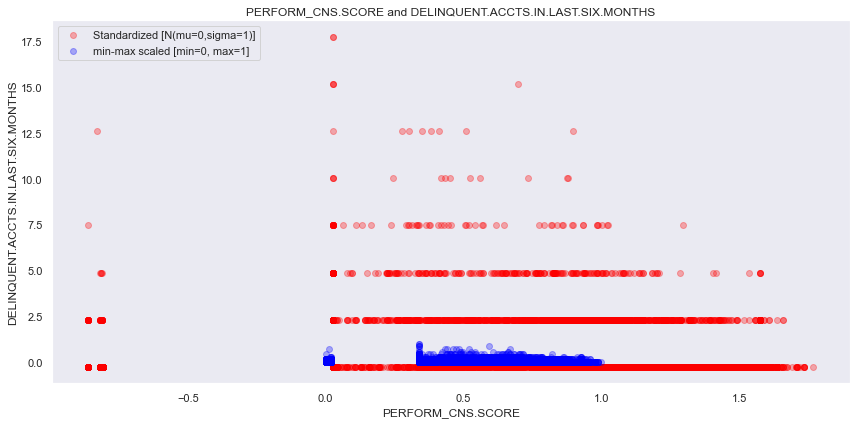

In [70]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(12,6))

    #plt.scatter(df['PERFORM_CNS.SCORE'], df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'],
            #color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
            label='Standardized [N(mu=0,sigma=1)]', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('PERFORM_CNS.SCORE and DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS')
    plt.xlabel('PERFORM_CNS.SCORE')
    plt.ylabel('DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

In [ ]:
# The plot above includes the loan datapoints on 2 different scales: 
# #the input scale where the PERFORM_CNS.SCORE and DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS have their actual values (green), 
# the standardized features (red), and the normalized features (blue).

The plot above includes the loan datapoints on 2 different scales: 
the standardized features (red), and the normalized features (blue).

In [67]:
# fig, ax = plt.subplots(3, figsize=(6,14))

# for a,d,l in zip(range(len(ax)),
#                (df[['PERFORM_CNS.SCORE','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']].values, df_std, df_minmax),
#                ('Input scale',
#                 'Standardized [N  (mu=0,sigma=1)]',
#                 'min-max scaled [min=0, max=1]')
#                 ):
#     for i,c in zip(range(1,4), ('red', 'blue', 'green')):
#         ax[a].scatter(d[df['loan_default'].values == i, 0],
#                   d[df['loan_default'].values == i, 1],
#                   alpha=0.5,
#                   color=c,
#                   label='Class %s' %i
#                   )
#     ax[a].set_title(l)
#     ax[a].set_xlabel('Alcohol')
#     ax[a].set_ylabel('Malic Acid')
#     ax[a].legend(loc='upper left')
#     ax[a].grid()

# plt.tight_layout()

# plt.show()
